### Problem and Objective
##### You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from random import randrange,uniform
from scipy import stats
from sklearn.metrics import r2_score

In [2]:
# Set working directory
os.chdir("C:/Users/User/Desktop/edwisor/python/")
os.getcwd()

'C:\\Users\\User\\Desktop\\edwisor\\python'

In [3]:
print(os.listdir(os.getcwd()))

['day.csv', 'practice', 'test.csv', 'test_Predicted.csv', 'train_cab.csv']


In [4]:
# Load Both Data in .csv format
Train=pd.read_csv("train_cab.csv")
Test=pd.read_csv("test.csv")

In [5]:
Train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
Test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


## EXPLORATORY DATA ANALYSIS

In [7]:
# To check the data Types of Varaibles

Train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [8]:
Test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
#Shape of the data
Train.shape

(16067, 7)

In [10]:
Test.shape

(9914, 6)

### Missing Value Analysis

In [11]:
#sum of the missing values 

Train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

We observe that there are missing values present in Train data set

In [12]:
Test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

we observe that there are No missing values present in Test data set

In [13]:
#Create the dataframe of missing percentage
missing_value = pd.DataFrame(Train.isnull().sum())

#Reset the index
missing_value = missing_value.reset_index()

#Rename the variable
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_values'})

In [14]:
#Calculate the new variable - missing value percentage
missing_value['Missing_Value_Percentage'] = (missing_value.Missing_values/len(Train))*100

#arrange in descending order
missing_value = missing_value.sort_values('Missing_Value_Percentage', ascending=False).reset_index(drop=True)

In [15]:
missing_value

,Variables,Missing_values,Missing_Value_Percentage
0,passenger_count,55,0.342317
1,fare_amount,24,0.149374
2,pickup_datetime,0,0.000000
3,pickup_longitude,0,0.000000
4,pickup_latitude,0,0.000000
5,dropoff_longitude,0,0.000000
6,dropoff_latitude,0,0.000000


In [16]:
#From the above code we can observe that the null values available in the given dataset is less than 10% 
#hence can be dropped with out any issues
#Then we have to note that the object datatypes of the columns "fare_amount" and "pickup_datetime" needs to be converted.

In [17]:
# changing datatype of pickup_datetime variable from object to datetime
Train['pickup_datetime'] =  pd.to_datetime(Train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [18]:
print(Train['pickup_datetime'].isnull().sum())

1


In [19]:
# one value is null in pickup_datetime variable, so drop it.
Train = Train.drop(Train[Train['pickup_datetime'].isnull()].index, axis=0)

In [20]:
# separate the pickup_datetime column into separate fields like year, month,day, day of the week, hour etc.
Train['year'] =Train['pickup_datetime'].dt.year
Train['Month'] = Train['pickup_datetime'].dt.month
Train['Date'] = Train['pickup_datetime'].dt.day
Train['Day'] = Train['pickup_datetime'].dt.dayofweek
Train['Hour'] = Train['pickup_datetime'].dt.hour
Train['Minute'] = Train['pickup_datetime'].dt.minute

In [21]:
Train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [22]:
Train.shape

(16066, 13)

In [23]:
# checking null values
print(Train['pickup_datetime'].isnull().sum())
print(Train['year'].isnull().sum())
print(Train['Month'].isnull().sum())
print(Train['Date'].isnull().sum())
print(Train['Day'].isnull().sum())
print(Train['Hour'].isnull().sum())
print(Train['Minute'].isnull().sum())

0
0
0
0
0
0
0


In [24]:
#similarly on Test data set
Test['pickup_datetime'] =  pd.to_datetime(Test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC',errors="coerce")

In [25]:
Test['year'] = Test['pickup_datetime'].dt.year
Test['Month'] = Test['pickup_datetime'].dt.month
Test['Date'] = Test['pickup_datetime'].dt.day
Test['Day'] = Test['pickup_datetime'].dt.dayofweek
Test['Hour'] = Test['pickup_datetime'].dt.hour
Test['Minute'] = Test['pickup_datetime'].dt.minute


In [26]:
Test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [27]:
Test.shape

(9914, 12)

In [28]:
# Checking the fare_amount variable
#Converting fare_amount variable from object to numeric
Train["fare_amount"]=pd.to_numeric(Train["fare_amount"],errors = "coerce")

In [29]:
Train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [30]:
Train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16066, dtype: float64

In [31]:
Train["fare_amount"].describe()

count    16041.000000
mean        15.015223
std        430.474362
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [32]:
# We could observe above that there is huge difference in first three values of fare amount
# So first two values seems to be outlier in fare_amount, so drop them initially
#Also drop zero and negative values
Train = Train.drop(Train[Train["fare_amount"]>500  ].index, axis=0)
Train = Train.drop(Train[Train["fare_amount"]<=0 ].index, axis=0)
Train = Train.drop(Train[Train["fare_amount"].isnull()].index, axis=0)

In [33]:
#Working on column "passenger_count"
#any cab can not have more than 6 passengers, so we are dropping rows which includes more than 6 passengers
Train = Train.drop(Train[Train["passenger_count"]> 6 ].index, axis=0)
Train = Train.drop(Train[Train["passenger_count"]==0 ].index, axis=0)
Train = Train.drop(Train[Train["passenger_count"] == 0.12].index, axis=0)
Train = Train.drop(Train[Train["passenger_count"].isnull()].index, axis=0)

In [34]:
print(Train['passenger_count'].isnull().sum())

0


In [35]:
# Working on the columns "pickup_latitude","pickup_longitude","dropoff_latitude" & "dropoff_longitude"
# As we know that Lattitude ranges from (-90 to 90) and Longitude ranges from (-180 to 180)
# So, drop the rows which includes values outside the Lattitude and Longitude ranges`

In [36]:
Train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000
mean,11.375641,-72.475079,39.921495,-72.465336,39.899371,1.649645,2011.730868,6.264919,15.669811,3.034459,13.494246,29.655411
std,10.814944,10.538127,6.817244,10.566052,6.186041,1.265811,1.866810,3.447058,8.685896,1.968644,6.521489,17.299538
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992143,40.734946,-73.991181,40.734715,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981689,40.752640,-73.980157,40.753565,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966801,40.767382,-73.963643,40.768027,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [37]:
# We can see pickup_latitude has outlier
#dropping one value of >90
Train = Train.drop((Train[Train['pickup_latitude']< -90]).index, axis=0)
Train = Train.drop((Train[Train['pickup_latitude']> 90]).index, axis=0)

In [38]:
Train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Calculating the distance based on latitude and longitude:
we are having the values of latitude and longitude, hence we can calculate the distance travelled by a passenger so that we can have only one input feature instead of four.
This helps in reduction of dimensions of input features which helps improving the model accuracy. 
We will calculate the distance using haversine formula.

In [39]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance

In [40]:
# function for calculating the distance using haversine formula.
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [41]:
# Applying the haversine formula on  both Train and Test datasets
Train['distance'] = Train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [42]:
Test['distance'] = Test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [43]:
Train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [44]:
Test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [45]:
#Working on column "Distance"
#Removing outliers
Train["distance"].describe(include="all")

count    15902.000000
mean        15.070783
std        311.732401
min          0.000000
25%          1.215750
50%          2.125950
75%          3.851269
max       8667.542104
Name: distance, dtype: float64

In [46]:
Train["distance"].sort_values(ascending=False).head(50)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
4567       25.735917
8105       24.690884
15023      24.125745
15178      23.814940
14099      23.696200
12433      23.513721
4268       23.196680
3216       23

In [47]:
# And after first 23 values, distance goes down to 129 km, So drop rows which includes distance above 130km
# distance can not be 0 km, so drop the rows which includes distance 0 km
Train=Train.drop(Train[Train["distance"]>130].index,axis=0)
Train=Train.drop(Train[Train["distance"]==0].index,axis=0)

In [48]:
#Since the pickup date time is splitted into different variables like month, year, day so on and also distance  variable has been created using pickup and drop longitudes and latitudes 
#So we will drop pickup date time, pickup and drop longitudes and latitudes variables on both Train and Test data.

In [49]:
cols=["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","Minute"]
Train=Train.drop(cols,axis=1)

In [50]:
Train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [51]:
Test=Test.drop(cols,axis=1)

In [52]:
Test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [53]:
Train.dtypes

fare_amount        float64
passenger_count    float64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [54]:
# Converting the all the datatypes of "columns" into desired format
Train["passenger_count"]=Train["passenger_count"].astype("int64")
Train["year"]=Train["year"].astype("int64")
Train["Month"]=Train["Month"].astype("int64")
Train["Date"]=Train["Date"].astype("int64")
Train["Day"]=Train["Day"].astype("int64")
Train["Hour"]=Train["Hour"].astype("int64")

In [55]:
#taking copy of the data

train_data_df1 = Train.copy()
test_data_df1 = Test.copy()

In [56]:
#### boxplot and scatter plot analysis for outlier detection

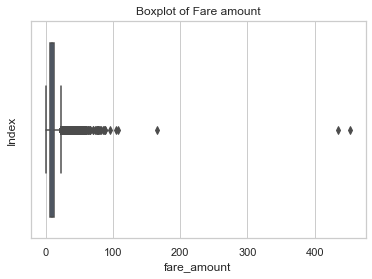

In [57]:
# checking boxplot of continous variable- Fare amount
sns.set(style="whitegrid")
sns.boxplot(y =Train['fare_amount'], orient="h")
plt.xlabel('fare_amount')
plt.ylabel('Index')
plt.title("Boxplot of Fare amount")
plt.show()

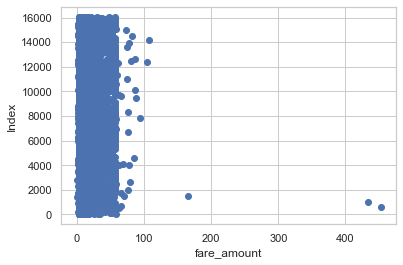

In [58]:
# scatter plot of fare amount

plt.scatter(x=Train.fare_amount, y=Train.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

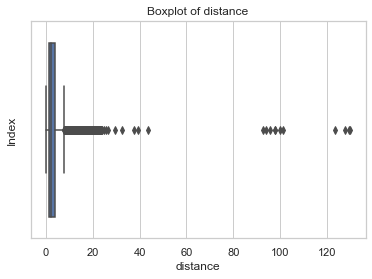

In [59]:
# checking boxplot of continous variable - Distance
sns.set(style="whitegrid")
sns.boxplot(y =Train['distance'], orient="h")
plt.xlabel('distance')
plt.ylabel('Index')
plt.title("Boxplot of distance")
plt.show()

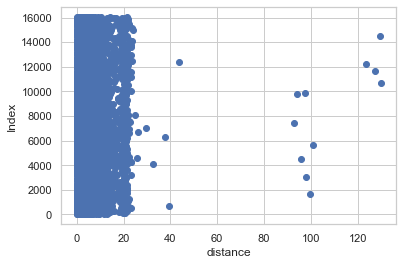

In [60]:
# scatter plot of Distance

plt.scatter(x=Train.distance, y=Train.index)
plt.ylabel('Index')
plt.xlabel('distance')
plt.show()

From above scatter plots, it is clear that fare greater than 100 is outlier and distance greater than 30 km is outlier. so, drop the rows which includes fare greater than 100 and distance greater than 30 km

In [61]:
Train = Train.drop(Train[Train['fare_amount'] > 100].index, axis=0)
Train = Train.drop(Train[Train['distance'] > 30].index, axis=0)

In [62]:
# # Visualization of Data

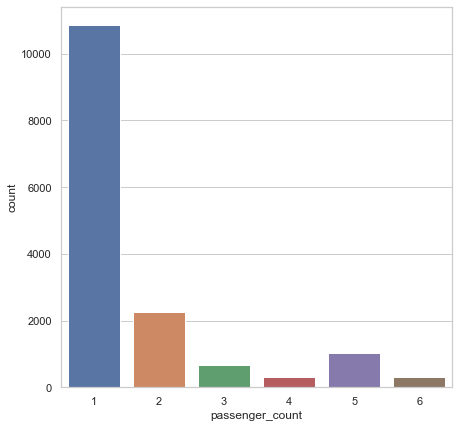

In [63]:
#passenger count visualization
plt.figure(figsize=(7,7))
sns.countplot(x="passenger_count", data=Train)

From the above graph it can be observe that the most of the rides were availed by one or two passengers at a time.

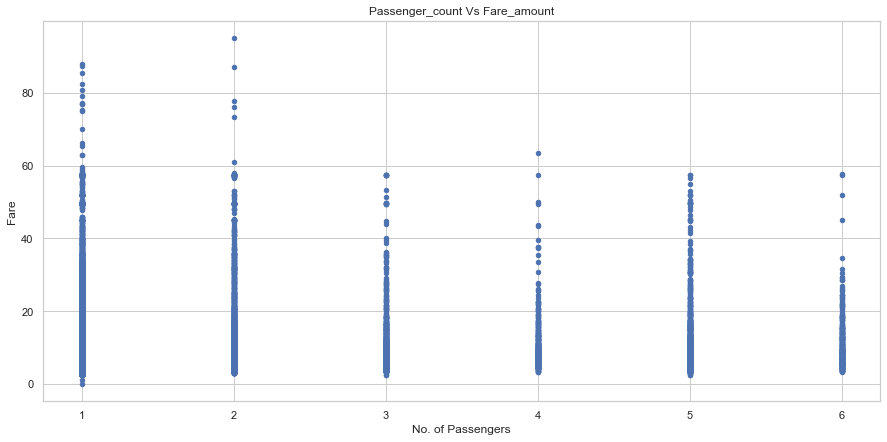

In [64]:
#Relationship beetween number of passengers and Fare amount

plt.figure(figsize=(15,7))
plt.scatter(x=Train['passenger_count'], y=Train['fare_amount'], s=20) #s means here ,s=number of dots
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.title("Passenger_count Vs Fare_amount")
plt.show()

From this graph it is observed that the revenue is more from the rides that are availed by one or two passengers at a time

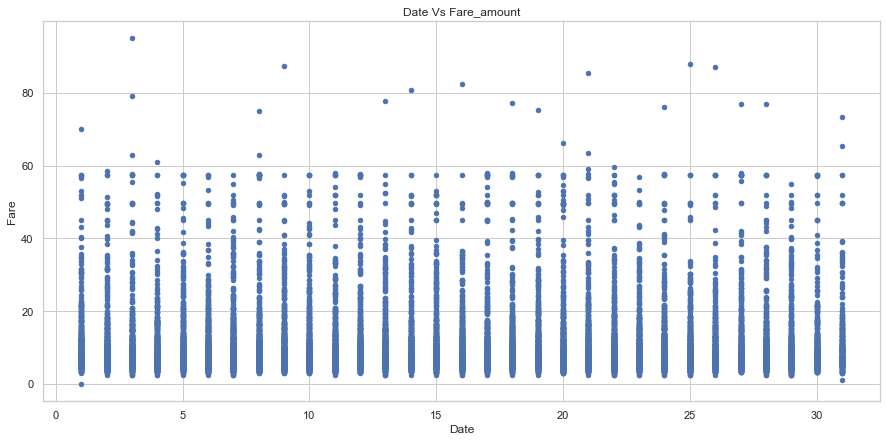

In [65]:
#Relationship between date and Fare amount
plt.figure(figsize=(15,7))
plt.scatter(x=Train['Date'], y=Train['fare_amount'], s=20)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.title("Date Vs Fare_amount")
plt.show()

From the above graph it is seen that highest fare was charged on 3rd and 24th of the month

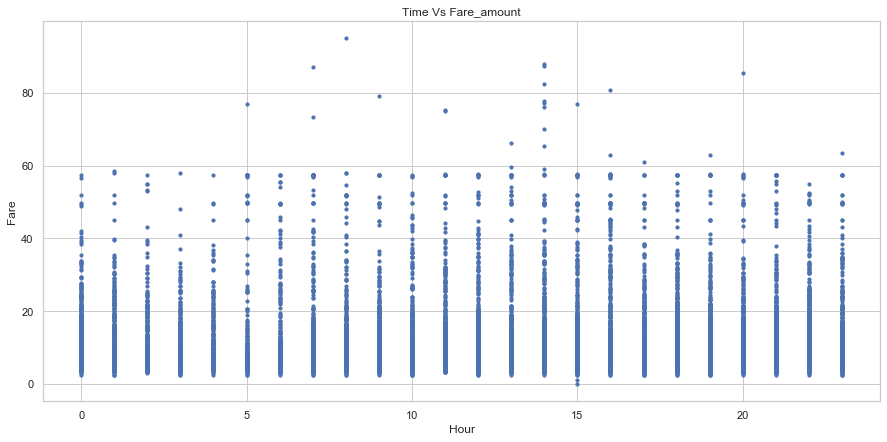

In [66]:
#Relationship between Time and Fare amount
plt.figure(figsize=(15,7))
plt.scatter(x=Train['Hour'], y=Train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.title("Time Vs Fare_amount")
plt.show()

The highest fare was 8AM in the morning, 2pm in afternoon and 10PM in the night of a day.

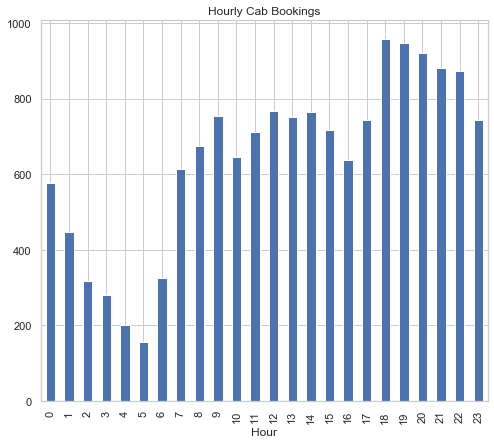

In [67]:
#Visualisation for hourly cab bookings
plt.figure(figsize=(8,7))
Train.groupby(Train["Hour"])['Hour'].count().plot(kind="bar")
plt.title("Hourly Cab Bookings")
plt.show()

We can confirm that least number of rides were at 5AM and more number of rides were taken at 6PM and 7PM, hence the high number of cars can be arranged at those peak hours.

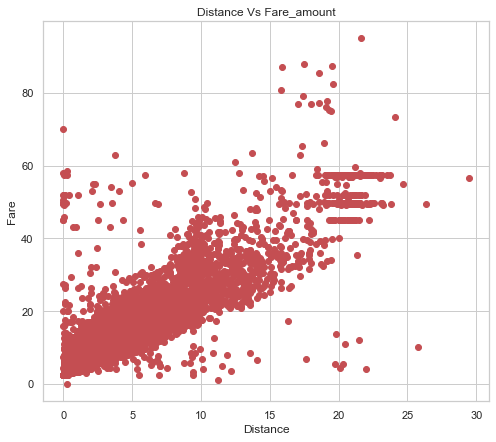

In [68]:
#Relationship between distance and fare amount
plt.figure(figsize=(8,7))
plt.scatter(x = Train['distance'],y = Train['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title("Distance Vs Fare_amount")
plt.show()

Most no of rides were taken between the distance 0 to 30kms, And also the highest fare being charged with in this limit.

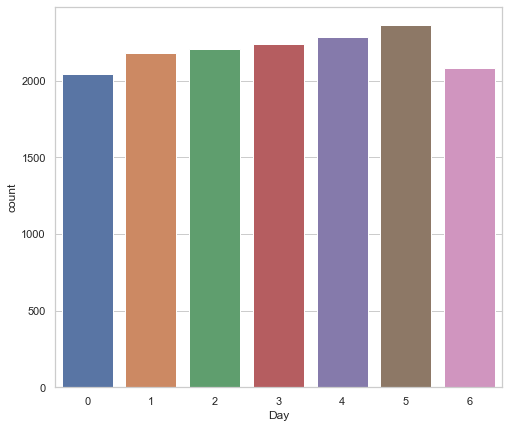

In [69]:
#impact of Day on the number of cab rides
plt.figure(figsize=(8,7))
sns.countplot(x="Day", data=Train)

We can see that the day is not impacting much on the number of rides

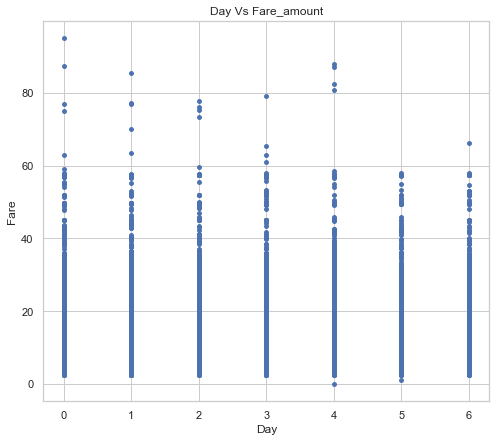

In [70]:
#Relationships between day and Fare amount
plt.figure(figsize=(8,7))
plt.scatter(x=Train['Day'], y=Train['fare_amount'], s=15)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.title("Day Vs Fare_amount")
plt.show()

The highest fare was charged on Monday, Thursday and Friday.

In [71]:
#taking copy of the data

train_data_df2 = Train.copy()
test_data_df2 = Test.copy()

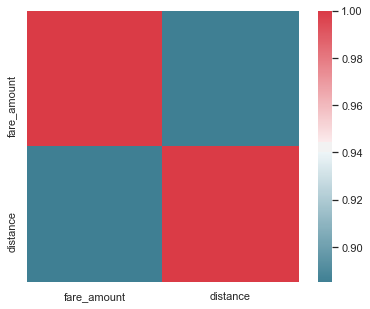

In [72]:
# Correlation Analysis
# generating the heatmap

cnames = ['fare_amount', 'distance']
df_corr = Train.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))

# correlation matrix
corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [73]:
# checking VIF for multicolinerity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_df = add_constant(Train.iloc[:,1:8])
pd.Series([variance_inflation_factor(VIF_df.values, i) 
               for i in range(VIF_df.shape[1])], 
              index=VIF_df.columns)


const              1.175167e+06
passenger_count    1.002383e+00
year               1.015269e+00
Month              1.015250e+00
Date               1.001272e+00
Day                1.010594e+00
Hour               1.010571e+00
distance           1.003535e+00
dtype: float64

From the above VIF values since they are less than 10 for each variable, there is no multicolinerity exists.

fare_amount


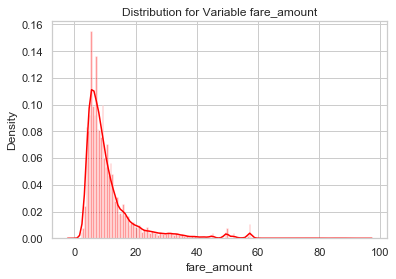

distance


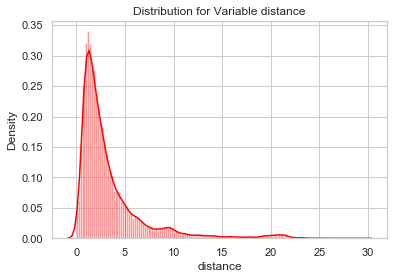

In [74]:
#Normality check 

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(Train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

From the above graph we observe that the distribution of "fare_amount" and "distance" are skewed. So to get right predictions we transform these values of two columns using logarithmic function.

In [75]:
#since the skewness of fare amount variable is high,we apply log transform to reduce the skewness
Train['fare_amount'] = np.log1p(Train['fare_amount'])

In [76]:
#since the skewness of distance variable is high, we apply log transform to reduce the skewness
Train['distance'] = np.log1p(Train['distance'])

fare_amount


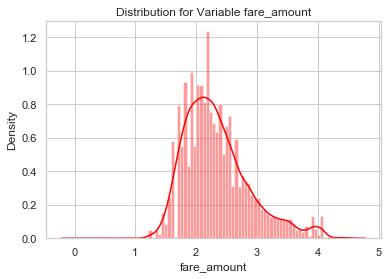

distance


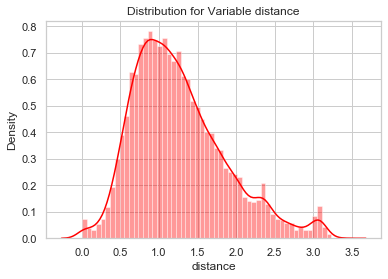

In [77]:
#Re-checking the Normality after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(Train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

From the above graph we observe that the distribution of "fare_amount" and "distance"  are not skewed and hence they are ready for the Training of a model.

In [78]:
Train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


In [79]:
Test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


## Models Development

In [80]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV

In [81]:
X=np.array(Train.iloc[:,1:])
y=np.array(Train.iloc[:,0])

In [82]:
# split train data into train and test

X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.2,random_state=1)

In [83]:
#define the Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

## Linear Regression Model

In [84]:
# Build model on train data
LR = LinearRegression().fit(X_Train , y_Train)

In [85]:
#Predict the model on Train data
pred_train_LR = LR.predict(X_Train)

In [86]:
#Predict the model on Test data
pred_test_LR = LR.predict(X_Test)

In [87]:
#MAPE
LRMape = MAPE(y_Train, pred_train_LR)

In [88]:
##calculate RMSE for Test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_Test, pred_test_LR))

In [89]:
##calculate RMSE for Train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_Train, pred_train_LR))

In [90]:
##calculate R^2 on train data
r2_train_LR = r2_score(y_Train, pred_train_LR)

##calculate R^2 on test data
r2_test_LR = r2_score(y_Test, pred_test_LR)

In [91]:
print("MAPE = "+str(LRMape))
print("RMSE on train data = "+str(RMSE_train_LR))
print("RMSE on test data = "+str(RMSE_test_LR))
print("r2 score on train data = "+str(r2_train_LR))
print("r2 score on test data = "+str(r2_test_LR))

MAPE = 7.385880554349929
RMSE on train data = 0.2572334751441916
RMSE on test data = 0.23494167589601445
r2 score on train data = 0.7757819647958124
r2 score on test data = 0.8100377286623632


## Decision Tree Model

In [92]:
#Train the data using Decision Tree model
DT = DecisionTreeRegressor(max_depth = 2).fit(X_Train, y_Train)
#Predict the model on Train data and test data
pred_train_DT = DT.predict(X_Train)
pred_test_DT = DT.predict(X_Test)

In [93]:
#MAPE
DTMape = MAPE(y_Train, pred_train_DT)

In [94]:
##calculate RMSE for Test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_Test, pred_test_DT))
##calculate RMSE for Train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_Train, pred_train_DT))

In [95]:
##calculate R^2 on train data
r2_train_DT = r2_score(y_Train, pred_train_DT)

##calculate R^2 on test data
r2_test_DT = r2_score(y_Test, pred_test_DT)

In [96]:
print("MAPE = "+str(DTMape))
print("RMSE on train data = "+str(RMSE_train_DT))
print("RMSE on test data = "+str(RMSE_test_DT))
print("r2 score on train data = "+str(r2_train_DT))
print("r2 score on test data = "+str(r2_test_DT))

MAPE = 9.415292382085193
RMSE on train data = 0.2914690450301004
RMSE on test data = 0.28143013485925555
r2 score on train data = 0.7121273214557522
r2 score on test data = 0.727423490035964


## Random Forest Regressor Model

In [97]:
#Train the data using Random Forest model
RF = RandomForestRegressor(n_estimators = 100).fit(X_Train, y_Train)
#Predict the model on Train data and test data
pred_train_RF = RF.predict(X_Train)
pred_test_RF = RF.predict(X_Test)

In [98]:
#MAPE
RFMape = MAPE(y_Train, pred_train_RF)

In [99]:
##calculate RMSE for Test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_Test, pred_test_RF))
##calculate RMSE for Train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_Train, pred_train_RF))

In [100]:
# calculate R^2 on train dataset
r2_train_RF = r2_score(y_Train, pred_train_RF)

# calculate R^2 on test dataset
r2_test_RF = r2_score(y_Test, pred_test_RF)

In [101]:
print("MAPE = "+str(RFMape))
print("RMSE on train data = "+str(RMSE_train_RF))
print("RMSE on test data = "+str(RMSE_test_RF))
print("r2 score on train data = "+str(r2_train_RF))
print("r2 score on test data = "+str(r2_test_RF))

MAPE = 2.7770433288365757
RMSE on train data = 0.09222857911192858
RMSE on test data = 0.2390542691604747
r2 score on train data = 0.971176507105449
r2 score on test data = 0.8033290403440289


Upon observing the values, we choose Random forest as best model and apply Hyper parameter Tuning for optimizing the results

## Applying Hyper-parameter Tuning for optimizing the results

##### There are 2 ways to apply hyper-parameter tuning
##### 1. RandomizedSearchCV
##### 2. GridSearchCV

#RandomizedSearchCV on Random Forest Model

In [102]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,RandomizedSearchCV
model_rrf = RandomForestRegressor(random_state = 42) 
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [103]:
# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(model_rrf, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_Train,y_Train)
predictions_RRF = randomcv_rf.predict(X_Test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_
predictions_RRF = best_model.predict(X_Test)

In [104]:
#R^2 score
RRF_r2 = r2_score(y_Test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_Test,predictions_RRF))

print('Randomized Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Randomized Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.81.
RMSE =  0.23635853653501906


## Grid Search CV for random Forest model

In [105]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_Train,y_Train)
view_best_params_GRF = gridcv_rf.best_params_

best_estimator_GRF = gridcv_rf.best_estimator_

#Apply model on test data
predictions_grf = best_estimator_GRF.predict(X_Test)

In [106]:
#R^2 score
grf_r2 = r2_score(y_Test, predictions_grf)
#Calculate RMSE
grf_rmse = np.sqrt(mean_squared_error(y_Test,predictions_grf))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(grf_r2))
print('RMSE = ',(grf_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 18}
R-squared = 0.81.
RMSE =  0.23449124746285915


Observations: Grid Search CV Random Forest Regressor Model shows better results.
Hence we choose that Model to predict the values for the "Test.csv"

## Selection of the model: Random Forest Regressor Model

In [107]:
train = train_data_df2.copy()

In [108]:
X = train.drop('fare_amount', axis=1).values
y = train['fare_amount'].values

In [109]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X,y)
view_best_params_GRF = gridcv_rf.best_params_
best_estimator_GRF = gridcv_rf.best_estimator_

predictions_GRF_test = best_estimator_GRF.predict(Test)

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(grf_r2))
print('RMSE = ',(grf_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.81.
RMSE =  0.23449124746285915


In [110]:
# # Creating the target label on the "Test"(Test.csv)

In [111]:
predictions_GRF_test
Test['Predicted_fare'] = predictions_GRF_test

In [112]:
predictions_GRF_test

array([ 9.94773355, 10.27565781,  4.95221369, ..., 46.61877211,
       23.01274936,  6.14832956])

In [113]:
Test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323259,9.947734
1,1,2015,1,27,1,13,2.425353,10.275658
2,1,2011,10,8,5,11,0.618628,4.952214
3,1,2012,12,1,5,21,1.961033,8.124924
4,1,2012,12,1,5,21,5.387301,15.083241


In [114]:
Test.describe()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.435371,11.533622
std,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.972374,8.541943
min,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.952214
25%,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.298277,6.452792
50%,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.217412,8.769837
75%,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.045302,12.842087
max,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.996040,59.221134


In [115]:
# Writing the whole dataframe into "test_Predicted.csv"
Test.to_csv('test_Predicted.csv')